In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_context(context = 'poster')

<h1 align="center">Exploratory Analysis for POP fMRI DCM Data: </h1>
<h3 align="center">Architecture One - Model Two</h3>

<img src="supportFiles/model2.png">

In [9]:
# Data path
data = './data/'

# Reading DCM paramter matrices for ModelTwo
a = pd.read_table(data + 'DCMmodelTwo_data_A.txt') # intrinsic connectivity
b = pd.read_table(data + 'DCMmodelTwo_data_B.txt') # modulatory effects of drive on connection
c = pd.read_table(data + 'DCMmodelTwo_data_C.txt') # drives to regions

# Reading DDM parameters for behavioral data
ddm = pd.read_csv(data + 'POP_model3-2_VAT_params.csv')

# Reading WMC measures
wmc = pd.read_csv(data + 'POP_id_wm.csv')

# Reading POP task behavioral data
bx = pd.read_csv(data + 'POP Behavioral Summary - Python (SD).csv')

In [10]:
# Previewing df content
a.head()
b.head()
c.head()

ddm.head()

wmc.head()

bx.head()

,Subject,IFG_RH-to-IFG_RH,IFG_RH-to-CAUD_RH,IFG_RH-to-PUT_RH,IFG_RH-to-STN_RH,IFG_RH-to-PP_RH,CAUD_RH-to-CAUD_RH,CAUD_RH-to-GPI_RH,PUT_RH-to-PUT_RH,PUT_RH-to-GPI_RH,STN_RH-to-STN_RH,STN_RH-to-GPI_RH,GPI_RH-to-IFG_RH,GPI_RH-to-GPI_RH,PP_RH-to-PP_RH
0,16048,-0.481110,-0.393049,-0.035681,-0.047163,0.507146,-0.494900,0.087757,-0.498435,0.015562,-0.498602,0.019382,-0.179555,-0.499595,-0.494316
1,16050,-0.380311,0.470372,0.218799,1.031829,0.113497,-0.491271,0.229470,-0.493144,0.102161,-0.476498,0.319125,-0.026927,-0.501721,-0.568467
2,16052,-0.567080,0.199249,-0.284961,0.624402,0.400610,-0.316637,0.350671,0.207120,0.333901,-0.639353,-0.356883,0.940018,-0.350345,-0.667314
3,16053,-0.500175,-0.209840,0.219920,-0.284117,-0.975879,-0.163864,-0.221405,-0.515758,-0.459977,0.053604,0.316762,1.109014,-0.411309,-0.045574
4,16054,-0.308158,-0.126533,-0.171624,-0.262092,0.166206,-0.417825,0.132375,-0.375186,0.136500,-0.364785,0.125885,0.843330,-0.396821,-0.535335


,Subject,IFG_RH-to-CAUD_RH-by-Inc_Cues,GPI_RH-to-IFG_RH-by-Pro_Inc_Arrows,STN_RH-to-GPI_RH-by-Rea_Inc_Arrow
0,16048,-0.101146,0.034960,0.016366
1,16050,-0.013558,-0.103458,0.026739
2,16052,-0.531737,1.645330,-1.709006
3,16053,-1.748793,-0.290486,-1.532305
4,16054,-0.309024,0.238522,0.319245


,Subject,Cues-to-IFG_RH,Arrows-to-PP_RH
0,16048,-0.093887,0.103608
1,16050,0.180941,1.843463
2,16052,-0.858342,1.987371
3,16053,-0.768790,1.048397
4,16054,-0.944072,2.488370


,Subject,a_Cc_mean,v_Cc_mean,a_Ci_mean,v_Ci_mean,a_NCc_mean,v_NCc_mean,a_NCi_mean,v_NCi_mean,t_C_mean,t_NC_mean
0,16048,2.043445,1.732318,2.701031,1.955916,2.799350,2.734599,2.397028,1.998680,0.291099,0.401819
1,16050,1.192783,3.417405,1.792829,3.208320,1.480833,3.786338,1.382813,2.143612,0.245273,0.267914
2,16051,1.005285,4.896075,1.333776,3.951237,1.257180,3.057926,1.737084,3.499277,0.233655,0.259014
3,16052,1.804825,3.283169,1.800410,3.257707,1.712263,3.587484,2.436187,3.393481,0.219707,0.265498
4,16053,1.427812,3.855500,1.552936,3.894774,1.434788,3.507232,1.793490,3.629197,0.246711,0.320006


,Subject,ospan
0,16048,21
1,16050,68
2,16051,59
3,16052,75
4,16053,23


,Subject,CuedInc.RT,CuedInc.ACC,CuedCon.RT,CuedCon.ACC,NCInc.RT,NCInc.ACC,NCCon.RT,NCCon.ACC,Overall.ACC,CuedEffect.RT,NCEffect.RT,CuedInc.TACC,CuedCon.TACC,NCInc.TACC,NCCon.TACC,Inc.RT,Con.RT,Cued.RT,NC.RT
0,16048,1037.500000,1.0,821.666667,0.933333,1026.888889,0.9,923.200000,1.000000,0.9625,215.833333,103.688889,1.570796,1.309639,1.249046,1.570796,1032.194444,872.433333,929.583333,975.044444
1,16049,564.800000,0.5,468.923077,0.466667,660.000000,0.4,591.200000,0.500000,0.4750,95.876923,68.800000,0.785398,0.752040,0.684719,0.785398,612.400000,530.061538,516.861538,625.600000
2,16050,465.777778,1.0,406.413793,0.966667,542.625000,0.8,458.400000,1.000000,0.9625,59.363985,84.225000,1.570796,1.387192,1.107149,1.570796,504.201389,432.406897,436.095785,500.512500
3,16051,362.300000,1.0,322.700000,1.000000,484.300000,1.0,444.464286,0.933333,0.9750,39.600000,39.835714,1.570796,1.570796,1.570796,1.309639,423.300000,383.582143,342.500000,464.382143
4,16052,475.000000,1.0,482.655172,1.000000,606.100000,1.0,500.533333,1.000000,1.0000,-7.655172,105.566667,1.570796,1.570796,1.570796,1.570796,540.550000,491.594253,478.827586,553.316667


## WMC 
### DCM Matrix A: Intrinsic Connectivity

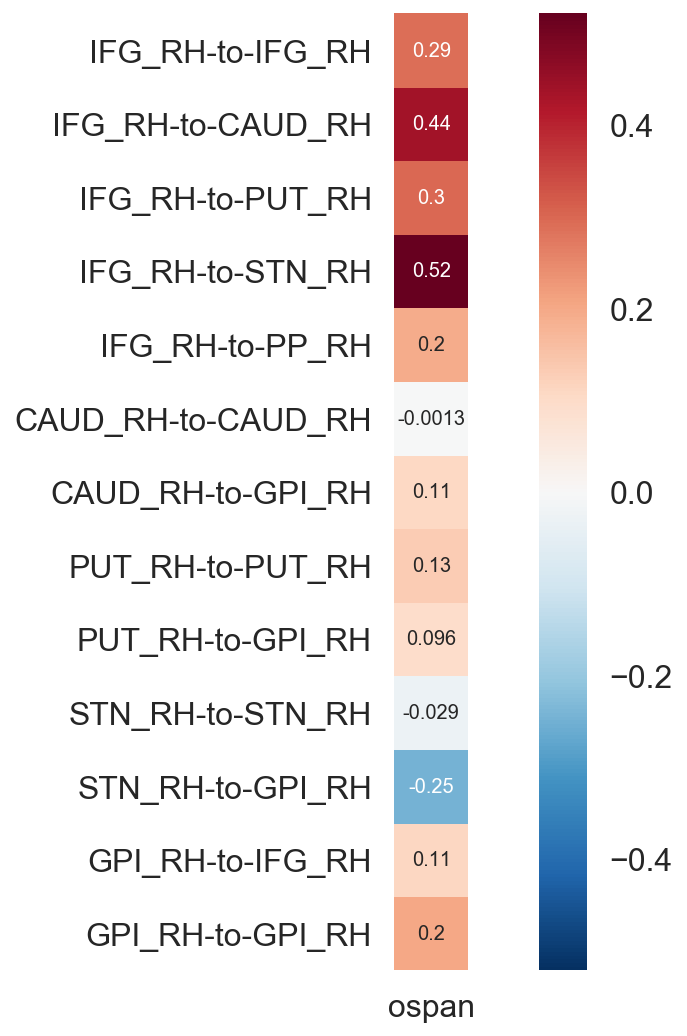

In [11]:
ax = sns.heatmap(a.merge(wmc).corr().iloc[1:14,-1:], 
                 annot=True, 
                 annot_kws={'size':10},
                 square=True)

In [12]:
aMelt = a.melt(id_vars=['Subject'])

aWMC = aMelt.merge(wmc, on='Subject')
aWMC.head(10)

,Subject,variable,value,ospan
0,16048,IFG_RH-to-IFG_RH,-0.481110,21
1,16048,IFG_RH-to-CAUD_RH,-0.393049,21
2,16048,IFG_RH-to-PUT_RH,-0.035681,21
3,16048,IFG_RH-to-STN_RH,-0.047163,21
4,16048,IFG_RH-to-PP_RH,0.507146,21
5,16048,CAUD_RH-to-CAUD_RH,-0.494900,21
6,16048,CAUD_RH-to-GPI_RH,0.087757,21
7,16048,PUT_RH-to-PUT_RH,-0.498435,21
8,16048,PUT_RH-to-GPI_RH,0.015562,21
9,16048,STN_RH-to-STN_RH,-0.498602,21


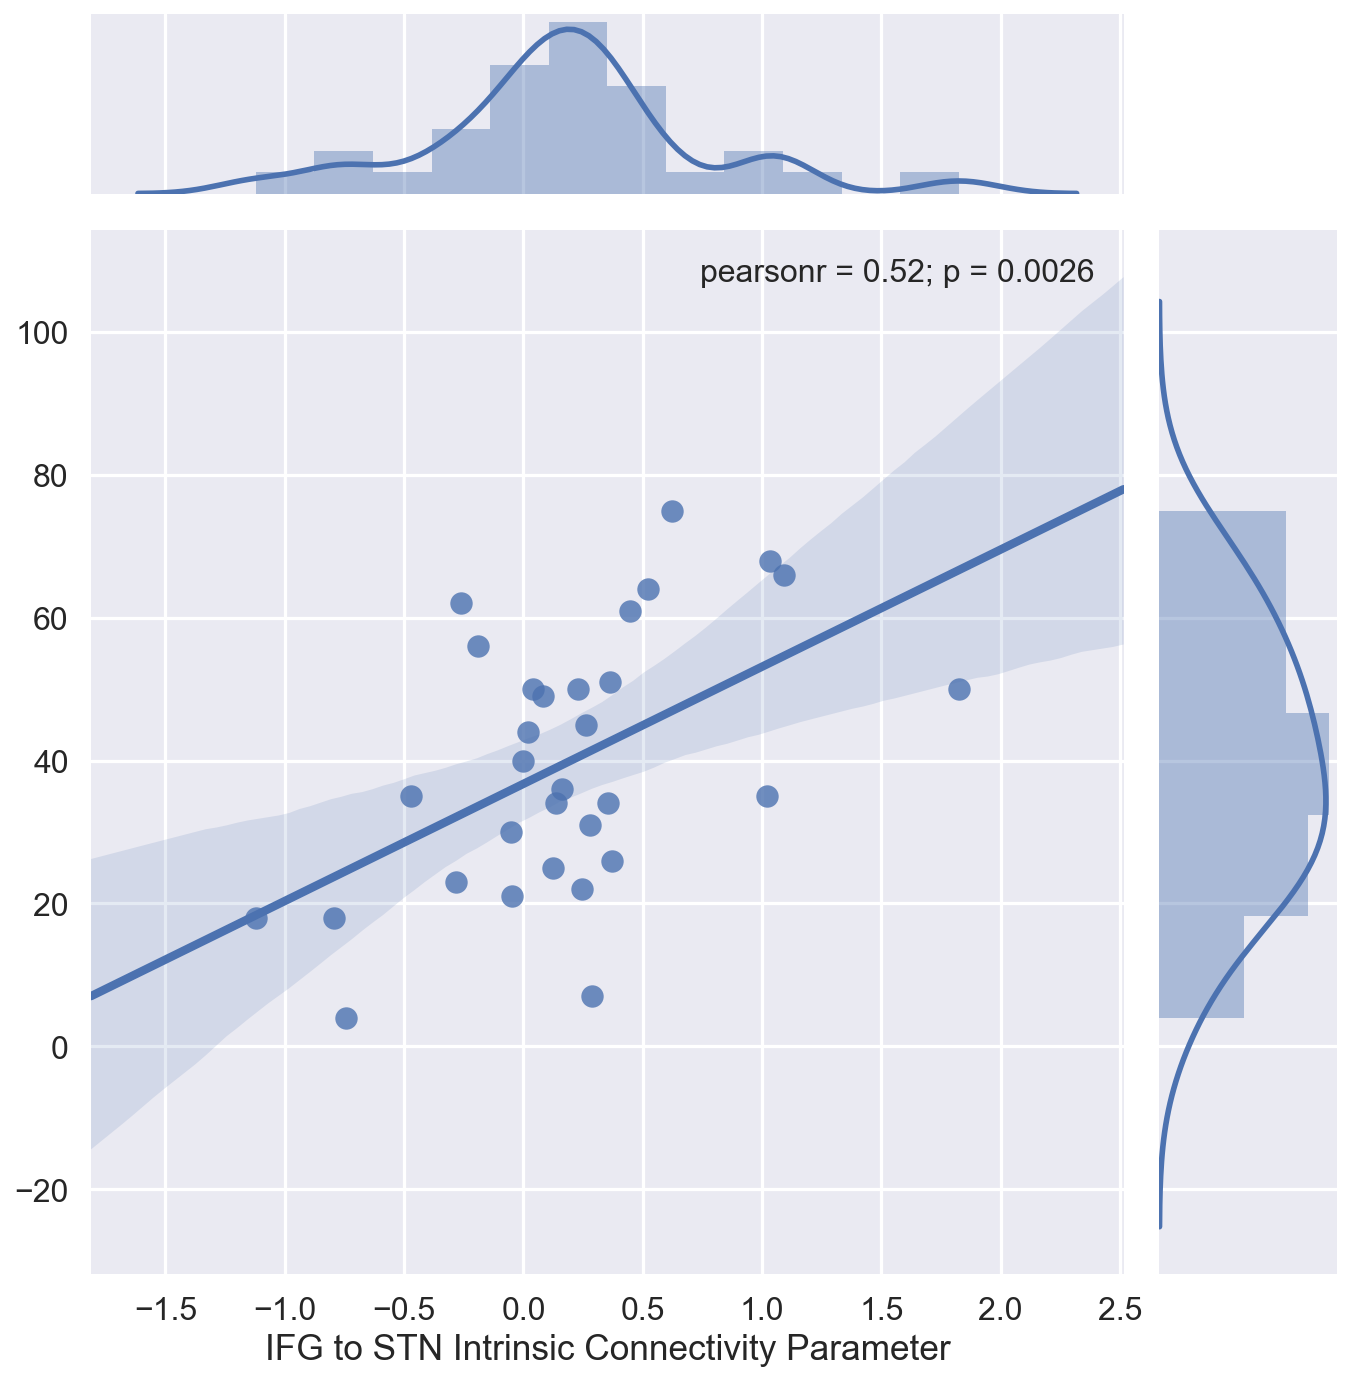

In [13]:
fig = sns.jointplot(x='value', 
                    y='ospan', 
                    data=aWMC[aWMC['variable'] == 'IFG_RH-to-STN_RH'], 
                    kind='reg', 
                    size=10)

fig.set_axis_labels(xlabel='IFG to STN Intrinsic Connectivity Parameter')

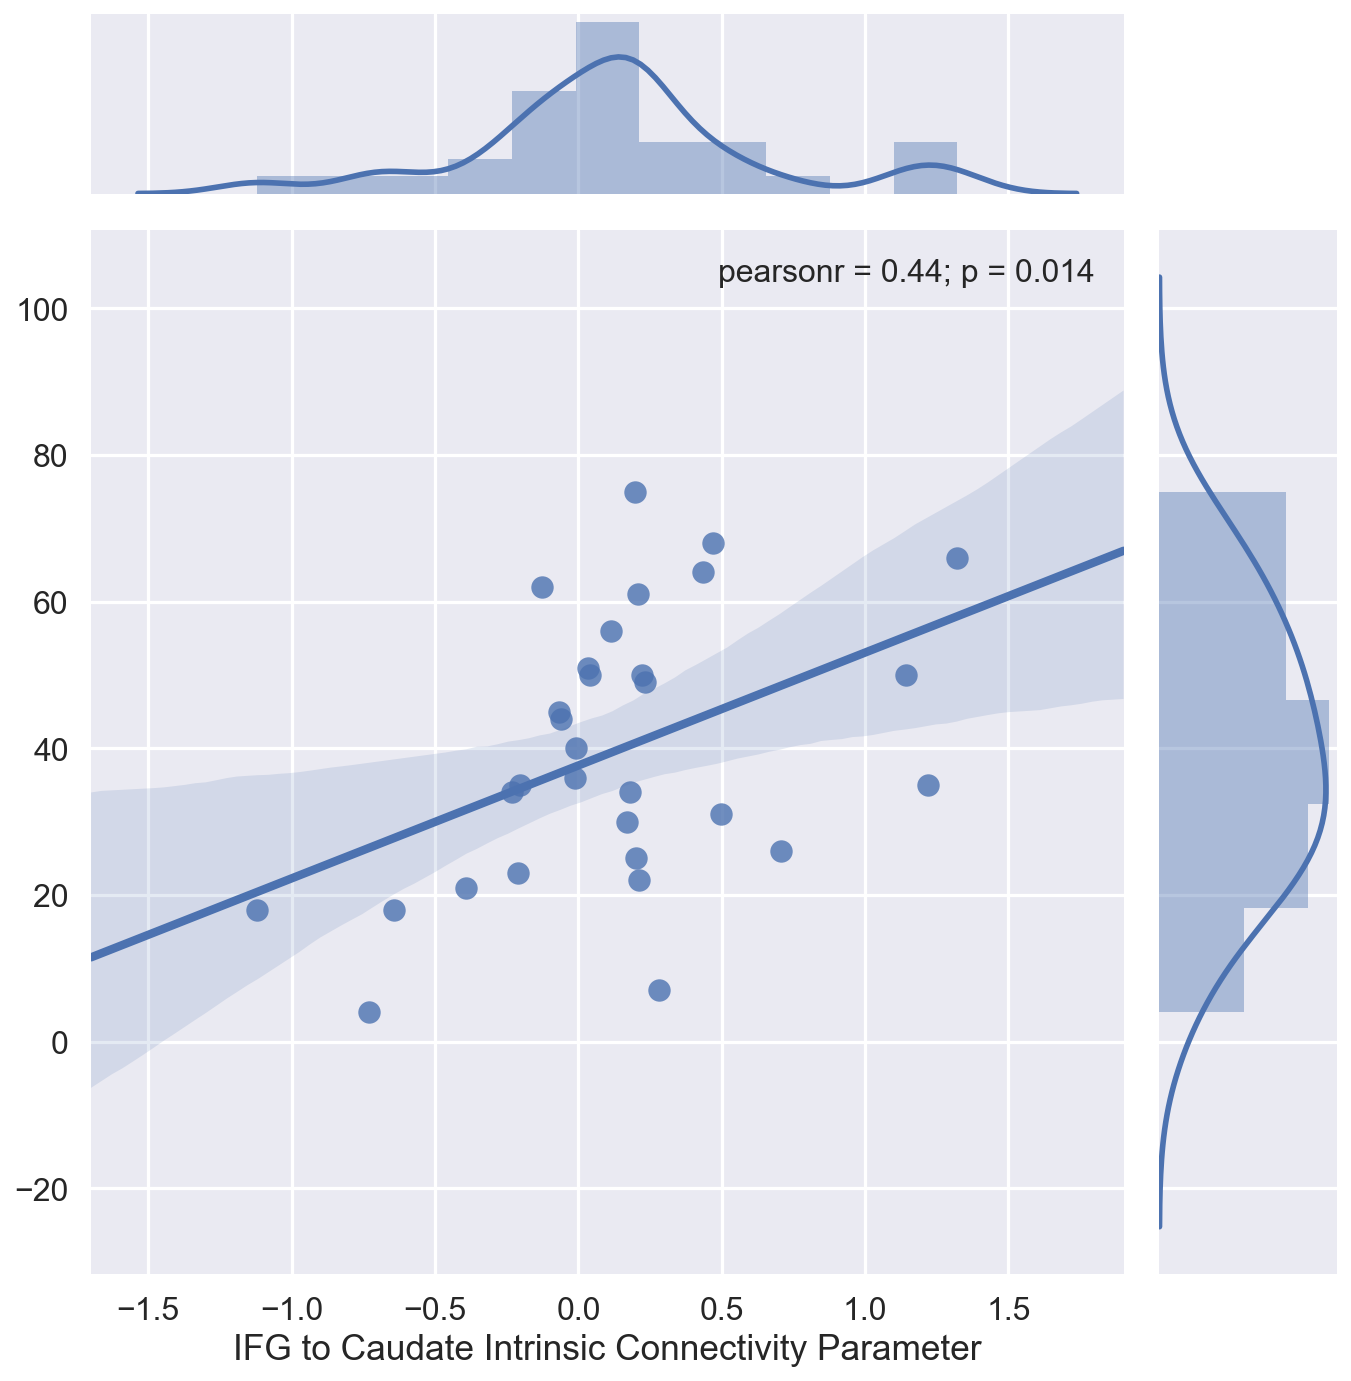

In [15]:
fig = sns.jointplot(x='value', 
                    y='ospan', 
                    data=aWMC[aWMC['variable'] == 'IFG_RH-to-CAUD_RH'], 
                    kind='reg', 
                    size=10)

fig.set_axis_labels(xlabel='IFG to Caudate Intrinsic Connectivity Parameter')

#### Interim Summary:
Intrinsic connectivity parameters in Model 2 were significantly related to WMC, as indexed by Ospan. IFG-to-STN (pearsonr = 0.52, 0.0026) and IFG-to-Putamen (pearsonr = 0.44, 0.014) positively predicted WMC. 

### DCM Matrix B: Modulatory effects of drives on connections

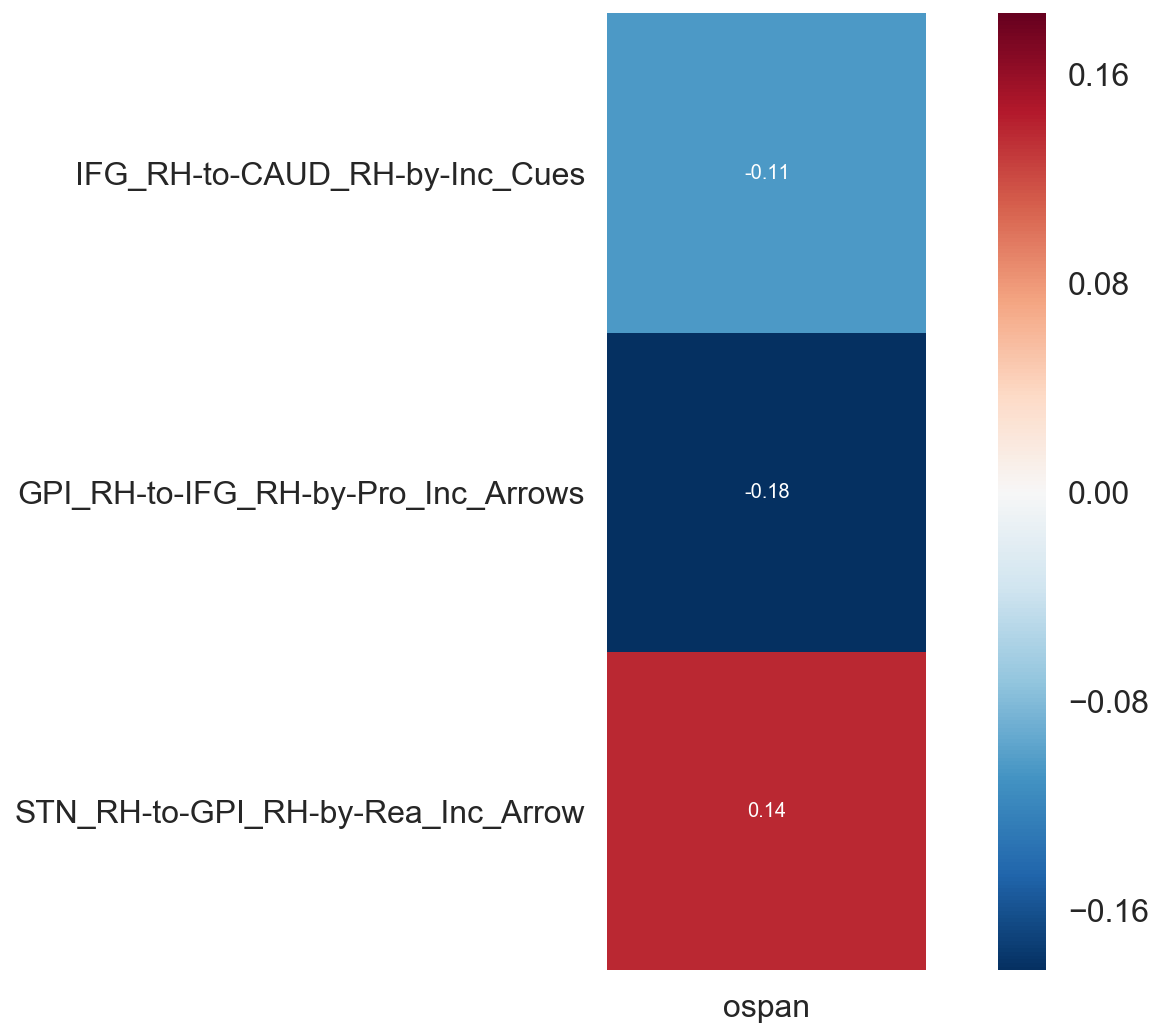

In [19]:
ax = sns.heatmap(b.merge(wmc).corr().iloc[1:4, -1:], 
                 annot=True, 
                 annot_kws={'size':10}, 
                 square=True)

### DCM Matrix C: Effects of Drives on Regions 

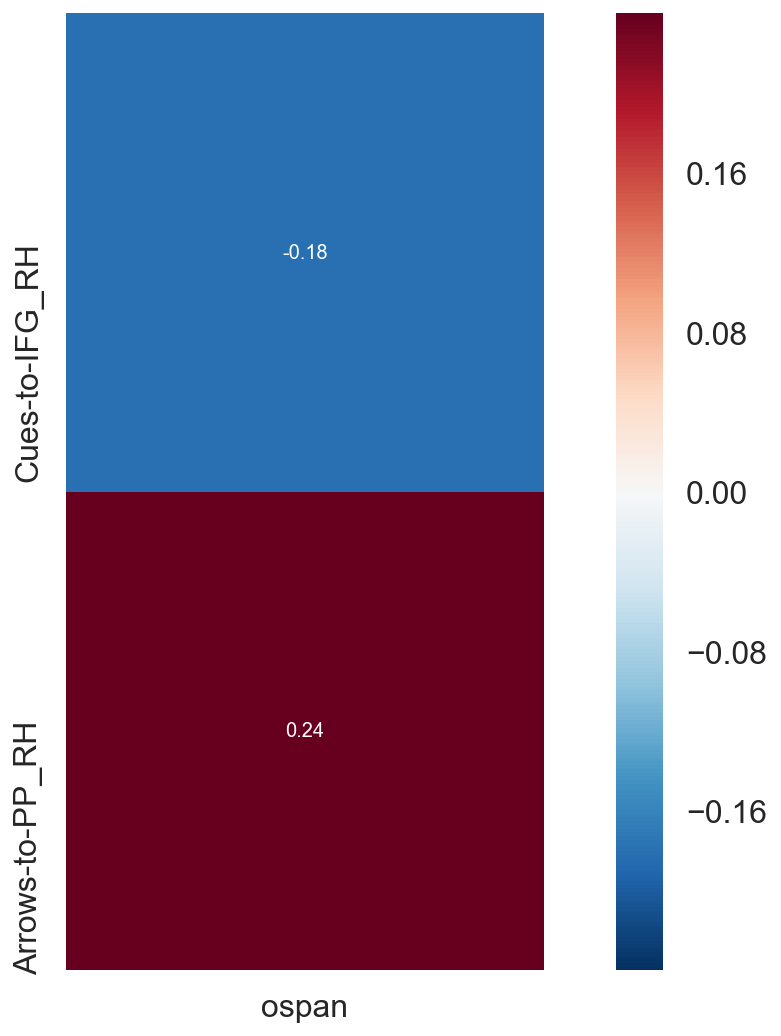

In [18]:
ax = sns.heatmap(c.merge(wmc).corr().iloc[1:3, -1:], 
                 annot=True, 
                 annot_kws={'size':10}, 
                 square=True)

In [21]:
cMelt = c.melt(id_vars=['Subject'])

cWMC = cMelt.merge(wmc, on='Subject')
cWMC.head()

,Subject,variable,value,ospan
0,16048,Cues-to-IFG_RH,-0.093887,21
1,16048,Arrows-to-PP_RH,0.103608,21
2,16050,Cues-to-IFG_RH,0.180941,68
3,16050,Arrows-to-PP_RH,1.843463,68
4,16052,Cues-to-IFG_RH,-0.858342,75


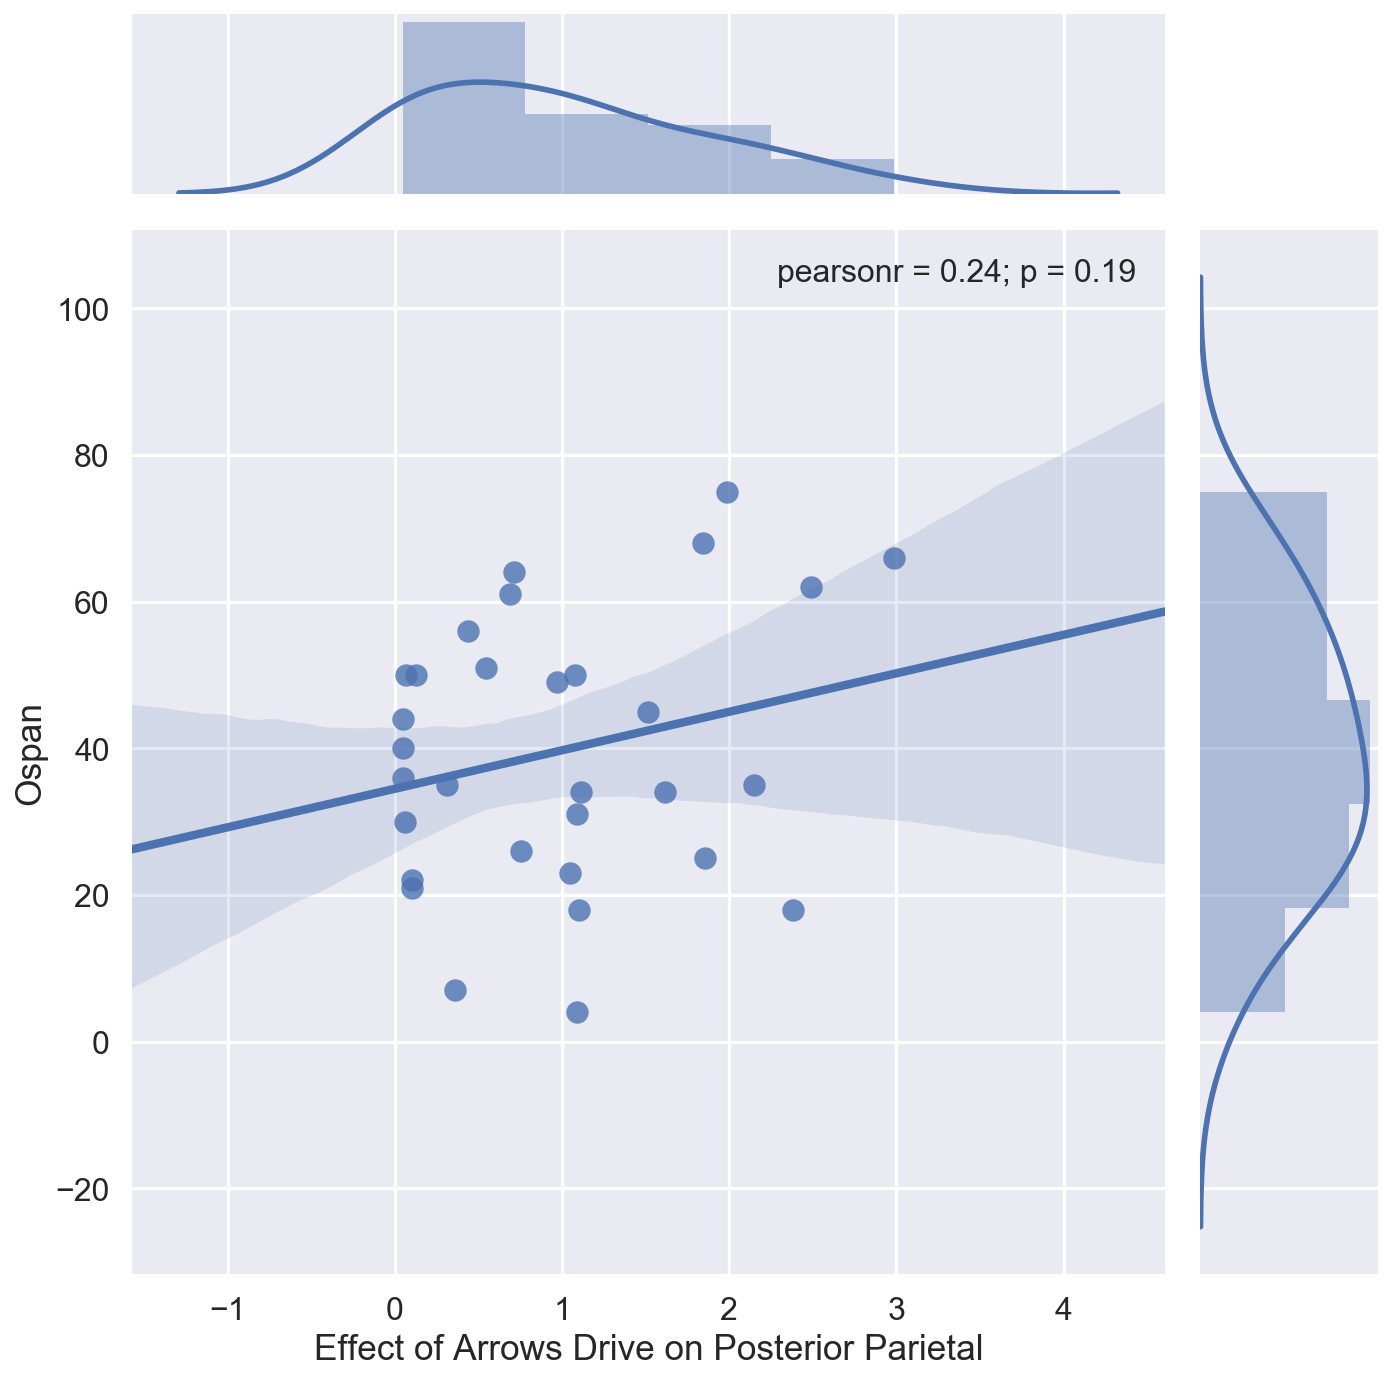

In [23]:
fig = sns.jointplot(x='value', 
                    y='ospan', 
                    data=cWMC[cWMC['variable'] == 'Arrows-to-PP_RH'], 
                    kind='reg', 
                    size=10)

fig.set_axis_labels(xlabel='Effect of Arrows Drive on Posterior Parietal', ylabel='Ospan')

## DDM
### DCM Matrix A: Intrinsic Connectivity

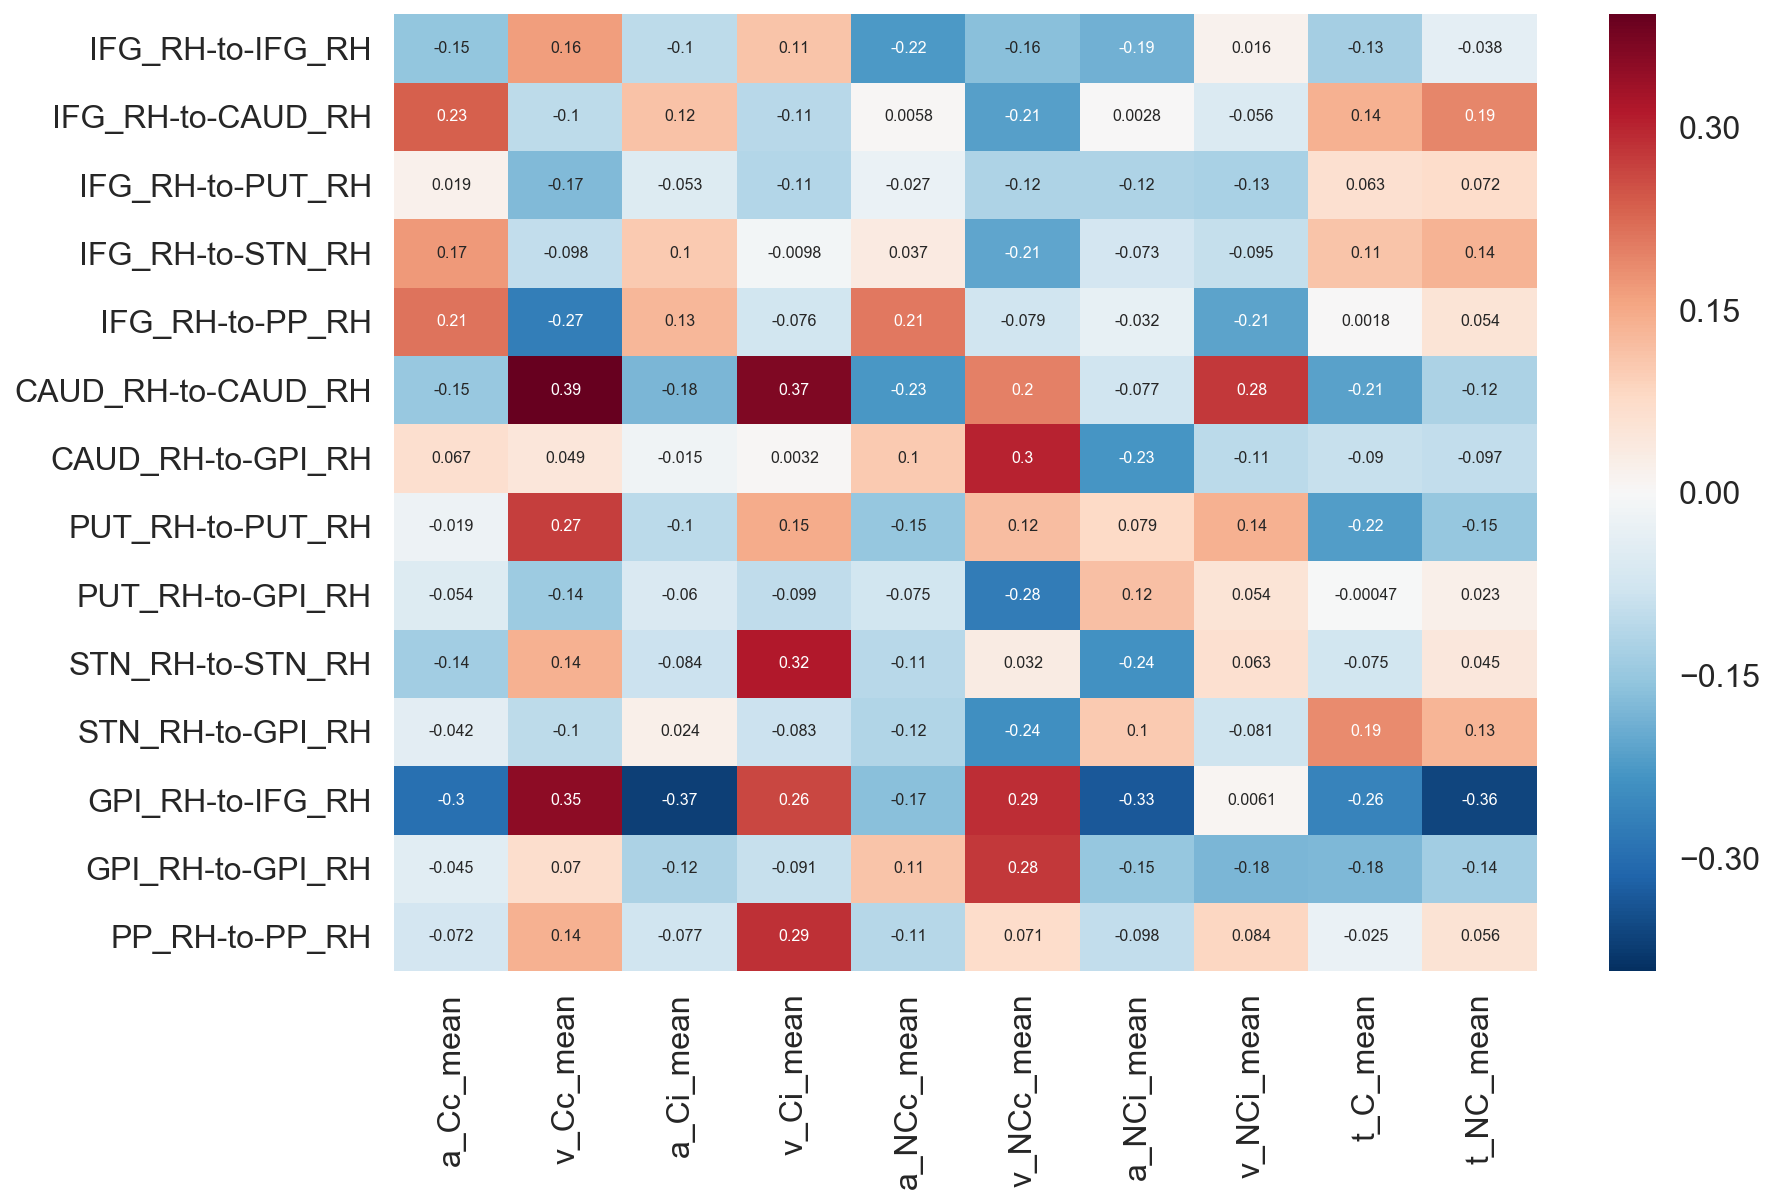

In [11]:
ax = sns.heatmap(a.merge(ddm).corr().iloc[1:15,15:], 
                 annot=True, 
                 annot_kws={'size':8})

In [13]:
aDDM = a.merge(ddm.melt(id_vars='Subject'), on='Subject')
aDDM.head()

,Subject,IFG_RH-to-IFG_RH,IFG_RH-to-CAUD_RH,IFG_RH-to-PUT_RH,IFG_RH-to-STN_RH,IFG_RH-to-PP_RH,CAUD_RH-to-CAUD_RH,CAUD_RH-to-GPI_RH,PUT_RH-to-PUT_RH,PUT_RH-to-GPI_RH,STN_RH-to-STN_RH,STN_RH-to-GPI_RH,GPI_RH-to-IFG_RH,GPI_RH-to-GPI_RH,PP_RH-to-PP_RH,variable,value
0,16048,-0.48111,-0.393049,-0.035681,-0.047163,0.507146,-0.4949,0.087757,-0.498435,0.015562,-0.498602,0.019382,-0.179555,-0.499595,-0.494316,a_Cc_mean,2.043445
1,16048,-0.48111,-0.393049,-0.035681,-0.047163,0.507146,-0.4949,0.087757,-0.498435,0.015562,-0.498602,0.019382,-0.179555,-0.499595,-0.494316,v_Cc_mean,1.732318
2,16048,-0.48111,-0.393049,-0.035681,-0.047163,0.507146,-0.4949,0.087757,-0.498435,0.015562,-0.498602,0.019382,-0.179555,-0.499595,-0.494316,a_Ci_mean,2.701031
3,16048,-0.48111,-0.393049,-0.035681,-0.047163,0.507146,-0.4949,0.087757,-0.498435,0.015562,-0.498602,0.019382,-0.179555,-0.499595,-0.494316,v_Ci_mean,1.955916
4,16048,-0.48111,-0.393049,-0.035681,-0.047163,0.507146,-0.4949,0.087757,-0.498435,0.015562,-0.498602,0.019382,-0.179555,-0.499595,-0.494316,a_NCc_mean,2.799350


In [14]:
aMeltDDMmelt = aMelt.merge(ddm.melt(id_vars='Subject'), on='Subject')
aMeltDDMmelt.head()

,Subject,variable_x,value_x,variable_y,value_y
0,16048,IFG_RH-to-IFG_RH,-0.48111,a_Cc_mean,2.043445
1,16048,IFG_RH-to-IFG_RH,-0.48111,v_Cc_mean,1.732318
2,16048,IFG_RH-to-IFG_RH,-0.48111,a_Ci_mean,2.701031
3,16048,IFG_RH-to-IFG_RH,-0.48111,v_Ci_mean,1.955916
4,16048,IFG_RH-to-IFG_RH,-0.48111,a_NCc_mean,2.799350


In [19]:
%%capture

for i in aMeltDDMmelt['variable_x'].unique():
    for j in aMeltDDMmelt['variable_y'].unique():
        fig = sns.jointplot(x='value_x', 
                            y='value_y', 
                            data=aMeltDDMmelt[(aMeltDDMmelt['variable_x'] == i) & (aMeltDDMmelt['variable_y'] == j)], 
                            kind='reg', 
                            size=10)

        fig.set_axis_labels(xlabel= i, ylabel= j)
        fig.savefig(i+j+'corr')

### DCM Matrix B: Modulatory effects of drives on connections

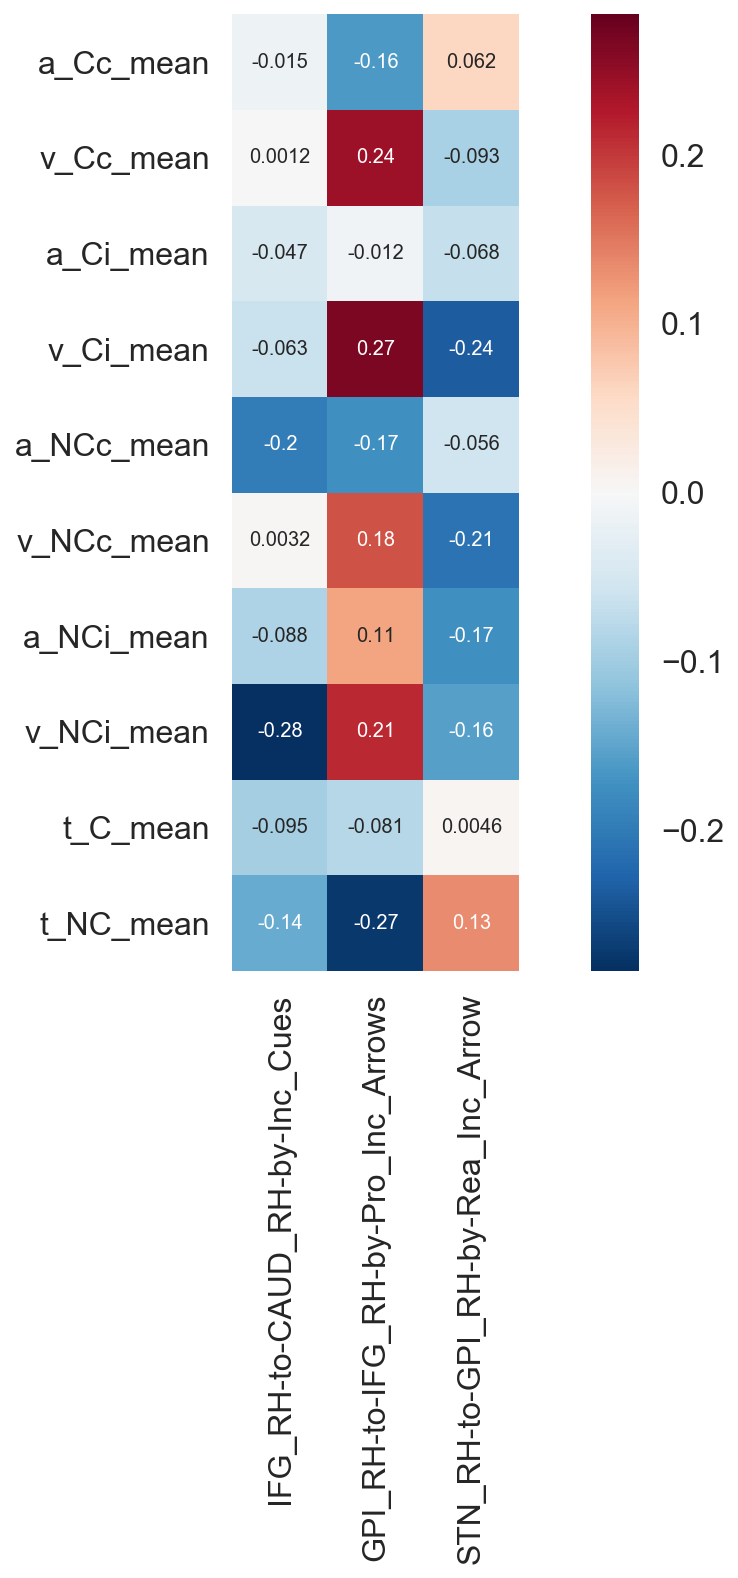

In [31]:
ax = sns.heatmap(b.merge(ddm).corr().iloc[4:,1:4], 
                 annot=True, 
                 annot_kws={'size':10}, 
                 square=True)